In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
wiki_data = pd.read_csv('wiki_people.csv', index_col = 'name')['text']
wiki_data.shape


(53164,)

In [3]:
wiki_data.head()

name
Mark Spencer (politician)    mark steven spencer born 20 january 1970is an ...
Madison U. Sowell            madison u sowell is the provost at southern vi...
Harry B. Luthi               harry b luthi sr born 1933 is a retired busine...
Abou Diaby                   vassiriki abou diaby french pronunciation abu ...
Roger Sedarat                roger sedarat is an iranianamerican poet he is...
Name: text, dtype: object

In [4]:
#One way to represent a text document is to count the instance of 
#every word in the document. Then articles can be compared based on
#how similar their word count vectors are.

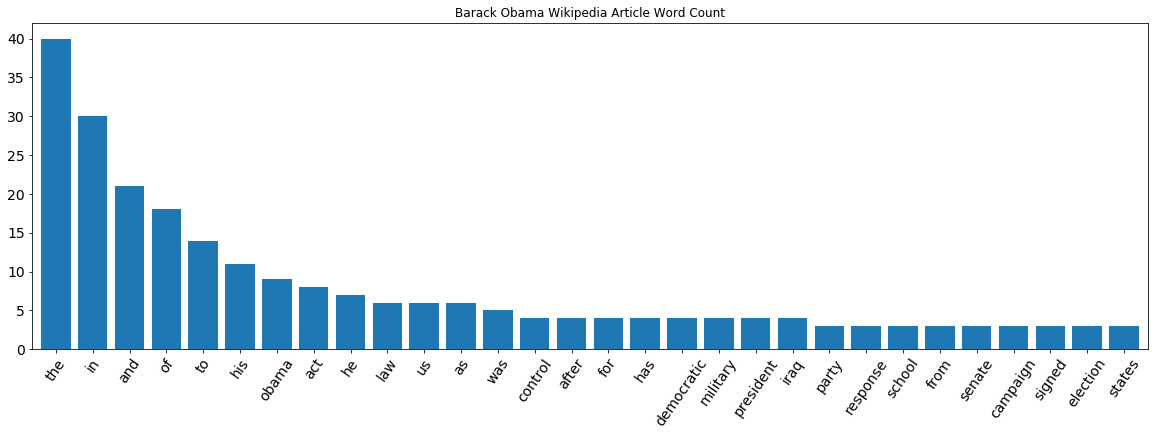

In [5]:
name = 'Barack Obama'
text = wiki_data[name]
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform([text])
features = count_vectorizer.get_feature_names()
data = pd.Series(count_matrix.toarray().flatten(), index = features).sort_values(ascending=False)
ax = data[:30].plot(kind='bar',figsize=(20,6),width=.8, fontsize=14,rot=55,title='Barack Obama Wikipedia Article Word Count')

In [6]:
#Term frequency-inverse document fequency is a statistic that reflects
#how importnat a word is to a specific document relative to all of the
#words in a collection of documents(the corpus). The tf-idf value increases
#proportionally to the number of times that word appears in the document,
#but is offset by the frequency of the word in the corpus.

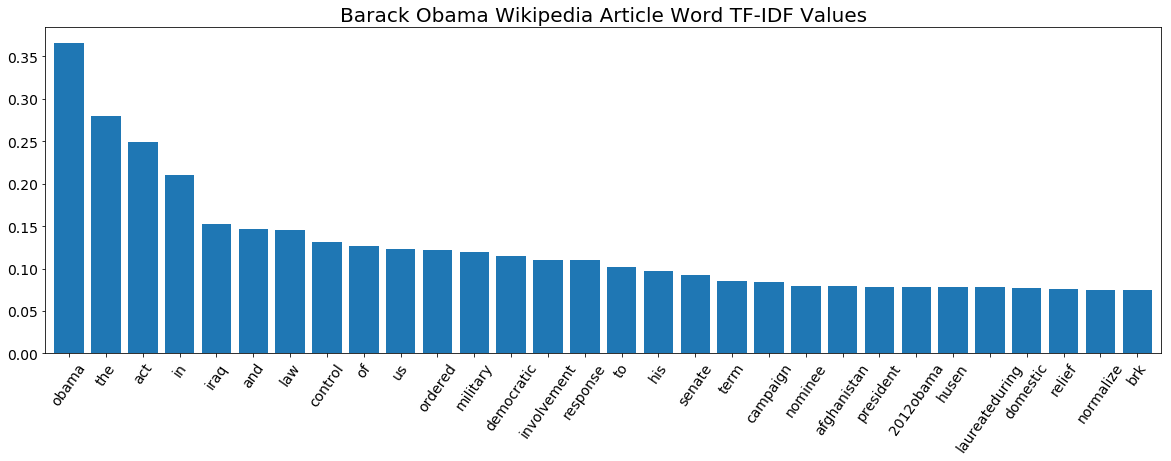

In [7]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(wiki_data)
features = tfidf_vectorizer.get_feature_names()
row = wiki_data.index.get_loc(name)
data = pd.Series(tfidf_matrix.getrow(row).toarray().flatten(), index = features).sort_values(ascending=False)
ax = data[:30].plot(kind='bar', title='Barack Obama Wikipedia Article Word TF-IDF Values', figsize=(20,6), width = .8, fontsize=14,rot=55)
ax.title.set_size(20)

In [8]:
knn = NearestNeighbors(n_neighbors=10).fit(tfidf_matrix)

In [9]:
def get_closest_neighbours(name):
    row = wiki_data.index.get_loc(name)
    distances, indices = knn.kneighbors(tfidf_matrix.getrow(row))
    names_similar = pd.Series(indices.flatten()).map(wiki_data.reset_index()['name'])
    result = pd.DataFrame({'distance':distances.flatten(), 'name':names_similar})
    return result



In [10]:
get_closest_neighbours("Barack Obama")

,distance,name
0,0.000000,Barack Obama
1,1.067974,Joe Biden
2,1.109491,Hillary Rodham Clinton
3,1.117104,Samantha Power
4,1.139620,Eric Stern (politician)
5,1.147363,George W. Bush
6,1.149957,John McCain
7,1.154632,Artur Davis
8,1.157366,Henry Waxman
9,1.159638,Jeff Sessions


In [12]:
get_closest_neighbours("Taylor Swift")

,distance,name
0,0.000000,Taylor Swift
1,1.109846,Carrie Underwood
2,1.129025,Kelly Clarkson
3,1.138605,Dolly Parton
4,1.139351,Joss Stone
5,1.148614,Ed Sheeran
6,1.151302,Rihanna
7,1.153083,JoJo (singer)
8,1.154104,Miranda Lambert
9,1.154456,Amy Grant
